# Figure 4 - tracking algorithm on toy examples

In [1]:
import numpy as np
import matplotlib.pylab as plt
import MEAutility as mu
from scipy.signal import resample_poly
from scipy.stats import kurtosis, linregress
from matplotlib import gridspec
from scipy import io
import numpy as np
import networkx as nx
from pathlib import Path
import sys
from pprint import pprint

#%matplotlib widget
%matplotlib notebook

from axon_velocity import *
from axon_velocity.models import load_cell
from axon_velocity.evaluation import *

In [2]:
save_fig = False
fig_folder =  Path('figures') / "figure4"
fig_folder.mkdir(exist_ok=True, parents=True)

### Define algorithm params

In [3]:
params = get_default_graph_velocity_params()
pprint(params)
# change params
params['detect_threshold'] = 0.01
params['kurt_threshold'] = None
params['init_delay'] = 0.1
params['upsample'] = 2

{'detect_threshold': 0.01,
 'detection_type': 'relative',
 'distance_exp': 2,
 'edge_dist_amp_ratio': 0.3,
 'init_amp_peak_ratio': 0.2,
 'init_delay': 0,
 'kurt_threshold': 0.3,
 'mad_threshold': 8,
 'max_distance_for_edge': 300,
 'max_distance_to_init': 200,
 'max_peak_latency_for_splitting': 1,
 'min_path_length': 100,
 'min_path_points': 5,
 'min_points_after_branching': 3,
 'min_selected_points': 30,
 'n_neighbors': 3,
 'neighbor_radius': 100,
 'neighbor_selection': 'amp',
 'peak_std_distance': 30,
 'peak_std_threshold': None,
 'r2_threshold': 0.9,
 'remove_isolated': True,
 'split_paths': True,
 'theilsen_maxiter': 2000,
 'upsample': 1}


## Bifurcation

In [4]:
cell_folder = Path('..') / 'simulations' / 'simulated_data' / 'toy' / 'bifurcation' / 'diam0-5' 

In [5]:
cell_path = [p for p in cell_folder.iterdir() if p.suffix == '.pkl'][0]
locs_path = [p for p in cell_folder.iterdir() if 'locations' in p.name][0]
template_path = [p for p in cell_folder.iterdir() if 'template' in p.name][0]

In [6]:
cell_b, sections_b = load_cell(cell_path)

ModuleNotFoundError: No module named 'LFPy'

In [ ]:
locations_b = np.load(locs_path)
template_b = np.load(template_path)

In [ ]:
fs = 1 / cell_b.dt * 1000

In [ ]:
gtr_b = GraphAxonTracking(template_b, locations_b, fs, verbose=True, **params)

In [ ]:
gtr_b.select_channels()

In [ ]:
gtr_b.build_graph(n_neighbors=3)

In [ ]:
fg_bif = gtr_b.plot_graph()

In [13]:
gtr_b.find_paths()

Searched paths from 3 nodes
Number of raw branches 3


In [14]:
gtr_b.clean_paths()

Removed 2 outliers from branch 0 with TheilSen regression
Removed 1 outliers from branch 2 with TheilSen regression
Number of clean branches 3


<IPython.core.display.Javascript object>


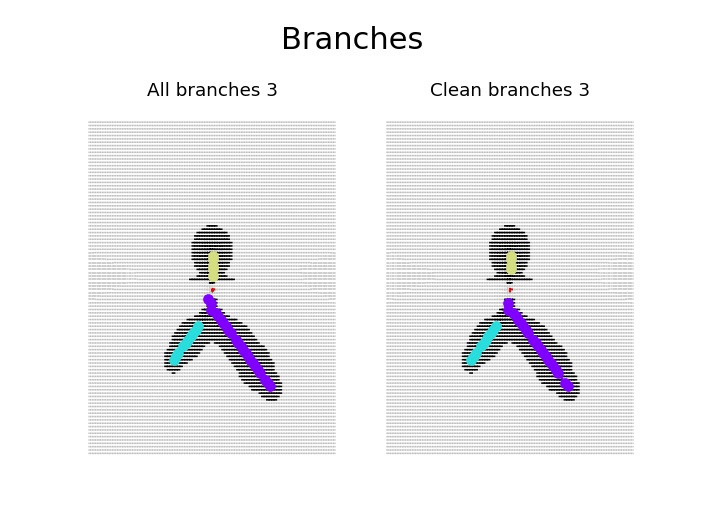

In [41]:
fpaths_bif = gtr_b.plot_branches()

In [16]:
ax = fpaths_bif.get_axes()[0]

# TODO save full paths and plot

<IPython.core.display.Javascript object>


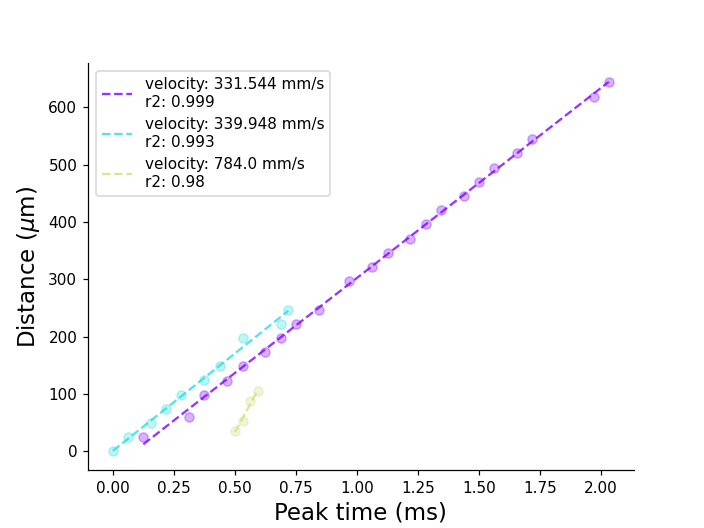

In [42]:
fvel_bif = gtr_b.plot_velocities()

In [18]:
branch_gt_b = extract_ground_truth_velocity(cell_b, sections_b)
for i, br in enumerate(branch_gt_b): 
    print(f"GT branch {i}: velocity {br['velocity']}")

GT branch 0: velocity 244.11925736749984
GT branch 1: velocity 363.6915051875968
GT branch 2: velocity 348.272827866117


<IPython.core.display.Javascript object>


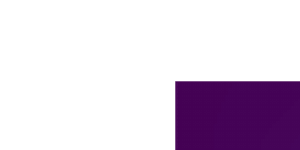

In [19]:
ax = plot_amplitude_map(template_b, locations_b, log=True, bg='off')

<IPython.core.display.Javascript object>


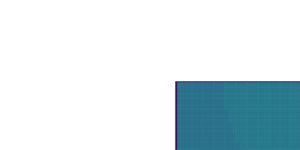

In [20]:
ax = plot_peak_latency_map(template_b, locations_b)

In [21]:
if save_fig:
    fg_bif.suptitle('')
    fg_bif.savefig(fig_folder / 'panelA_bifurcation-graph.pdf', transparent=True)
    fpaths_bif.suptitle('')
    fpaths_bif.savefig(fig_folder / 'panelC_bifurcation-paths.pdf', transparent=True)
    fvel_bif.suptitle('')
    fvel_bif.savefig(fig_folder / 'panelE_bifurcation-velocities.pdf', transparent=True)

## Sinusoidal

In [22]:
cell_folder = Path('..') / 'simulations' / 'simulated_data' / 'toy' / 'sinusoidal' / 'diam0-5' 

In [23]:
cell_path = [p for p in cell_folder.iterdir() if p.suffix == '.pkl'][0]
locs_path = [p for p in cell_folder.iterdir() if 'locations' in p.name][0]
template_path = [p for p in cell_folder.iterdir() if 'template' in p.name][0]

In [24]:
cell_s, sections_s = load_cell(cell_path)

In [25]:
locations_s = np.load(locs_path)
template_s = np.load(template_path)

In [26]:
fs = 1 / cell_s.dt * 1000

In [27]:
gtr_s = GraphAxonTracking(template_s, locations_s, fs, verbose=True, **params)

In [28]:
gtr_s.select_channels(init_delay=0.1)

Channel selection

Initial channels: 10000
1723 after detection filter
9218 after init_delay filter
Removing isolated channels
Removed 0 isolated channels


<IPython.core.display.Javascript object>


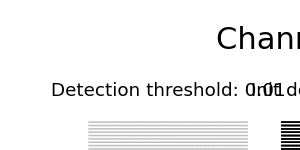

In [29]:
fig_select = gtr_s.plot_channel_selection()

In [30]:
#fig_select.savefig('../figures/channel_selection.pdf')

In [31]:
gtr_s.build_graph(n_neighbors=3)

Added 1495 nodes
Added 4463 edges
11 connected to init channel


<IPython.core.display.Javascript object>


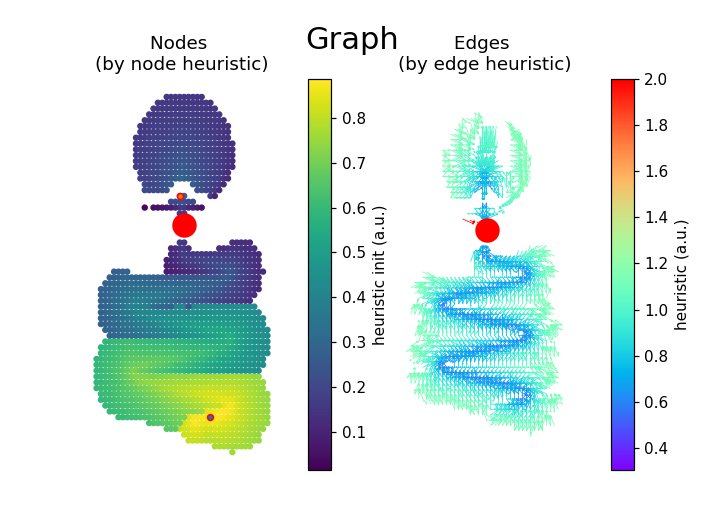

In [43]:
fg_sin = gtr_s.plot_graph()

In [33]:
gtr_s.find_paths(distance_exp=2)

Path starting at channel 4954 removed for minimum path length: 35.0um
Searched paths from 2 nodes
Number of raw branches 1


In [34]:
gtr_s.clean_paths()

Number of clean branches 1


<IPython.core.display.Javascript object>


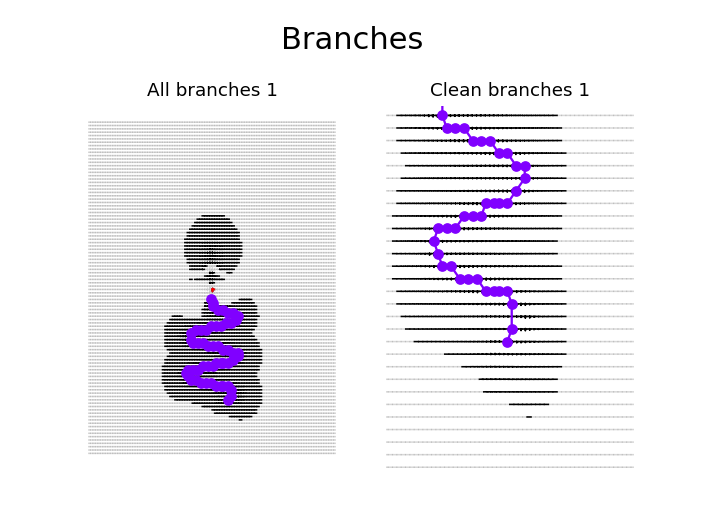

In [44]:
fpaths_sin = gtr_s.plot_branches()

<IPython.core.display.Javascript object>


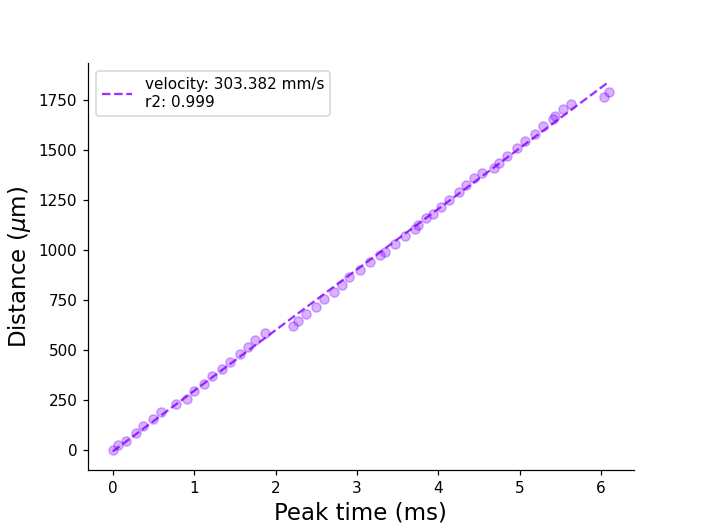

In [45]:
fvel_sin = gtr_s.plot_velocities()

<IPython.core.display.Javascript object>


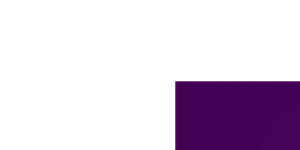

In [37]:
ax = plot_amplitude_map(template_s, locations_s, log=True, bg='off')

<IPython.core.display.Javascript object>


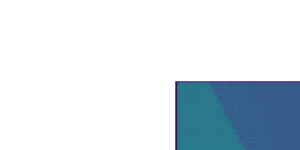

In [38]:
ax = plot_peak_latency_map(template_s, locations_s)

In [39]:
if save_fig:
    fg_sin.suptitle('')
    fg_sin.savefig(fig_folder / 'panelB_sinusoidal-graph.pdf', transparent=True)
    fpaths_sin.suptitle('')
    fpaths_sin.savefig(fig_folder / 'panelD_sinusoidal-paths.pdf', transparent=True)
    fvel_sin.suptitle('')
    fvel_sin.savefig(fig_folder / 'panelF_sinusoidal-velocities.pdf', transparent=True)